# Individual source/sink component contribution to monthly dissolved Mn concentrations

May, 2019

Consider repeating all the tests for the year 2015, rather than 2002.

In [8]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
from pylab import *
import matplotlib
import warnings
import pickle
warnings.filterwarnings("ignore")

%matplotlib notebook

In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1a | Dust, ice, bio          | [ice](#ice)                    |
| mn_test1b | Dust, bio               | [dust](#dust)                  |
| mn_test1c | Scavenging, bio         | [scavenging](#scavenging)      |
| mn_test1d | Rivers, bio             | [rivers](#rivers)              |
| mn_test1e | Sediment diffusion, bio | [sediment diffusion](#sediment)|
| mn_test1f | Bio                     | bio                            |

In [2]:
run_folder= '/data/brogalla/run_storage/'
mn_test1a = 'mn_test1a/'
mn_test1b = 'mn_test1b/'
mn_test1c = 'mn_test1c/'
mn_test1d = 'mn_test1d/'
mn_test1e = 'mn_test1e/'
mn_test1f = 'mn_test1f/'
mn_ref1   = 'mn_ref1/mn_ref1-2002_2019-05-29T151348.020422-0400/'
monthly_diff = 'ANHA12_EXH006_2002_monthly_diff.nc'
monthly_ave  = 'ANHA12_EXH006_2002_monthly.nc'

Mask land values

In [3]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[0,:,1480:2050,200:800]
tmask_full_ave     = np.zeros((12, 50, 570, 600))
tmask_full_ave[:]  = tmask
tmask_full_diff    = np.zeros((11, 50, 570, 600))
tmask_full_diff[:] = tmask

In [4]:
def load_monthly(test_run, storage=run_folder, diff=monthly_diff, ave=monthly_ave, \
                 mask_ave=tmask_full_ave, mask_diff=tmask_full_diff):
    
    test_ave  = nc.Dataset(storage+test_run+ave)
    test_diff = nc.Dataset(storage+test_run+diff)
    
    dmn_ave   = np.array(test_ave.variables['dissolmn'])
    dmn_diff  = np.array(test_diff.variables['dissolmn'])
    
    #apply land mask:
    cond_ave  = (mask_ave  < 0.1) 
    cond_diff = (mask_diff < 0.1)
    dmn_mave  = np.ma.masked_where(cond_ave, dmn_ave[:,0,:,:,:]) 
    dmn_mdiff = np.ma.masked_where(cond_diff, dmn_diff[:,0,:,:,:]) 
    
    return dmn_mave, dmn_mdiff

In [5]:
t1a_mn_ave, t1a_mn_diff   = load_monthly(mn_test1a)
t1b_mn_ave, t1b_mn_diff   = load_monthly(mn_test1b)
t1c_mn_ave, t1c_mn_diff   = load_monthly(mn_test1c)
t1d_mn_ave, t1d_mn_diff   = load_monthly(mn_test1d)
t1e_mn_ave, t1e_mn_diff   = load_monthly(mn_test1e)
t1f_mn_ave, t1f_mn_diff   = load_monthly(mn_test1f)
ref1_mn_ave, ref1_mn_diff = load_monthly(mn_ref1)

Load the lons, lats, etc.

In [6]:
ref   = nc.Dataset(run_folder+mn_test1b+monthly_ave)
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

Load map projection

<IPython.core.display.Javascript object>


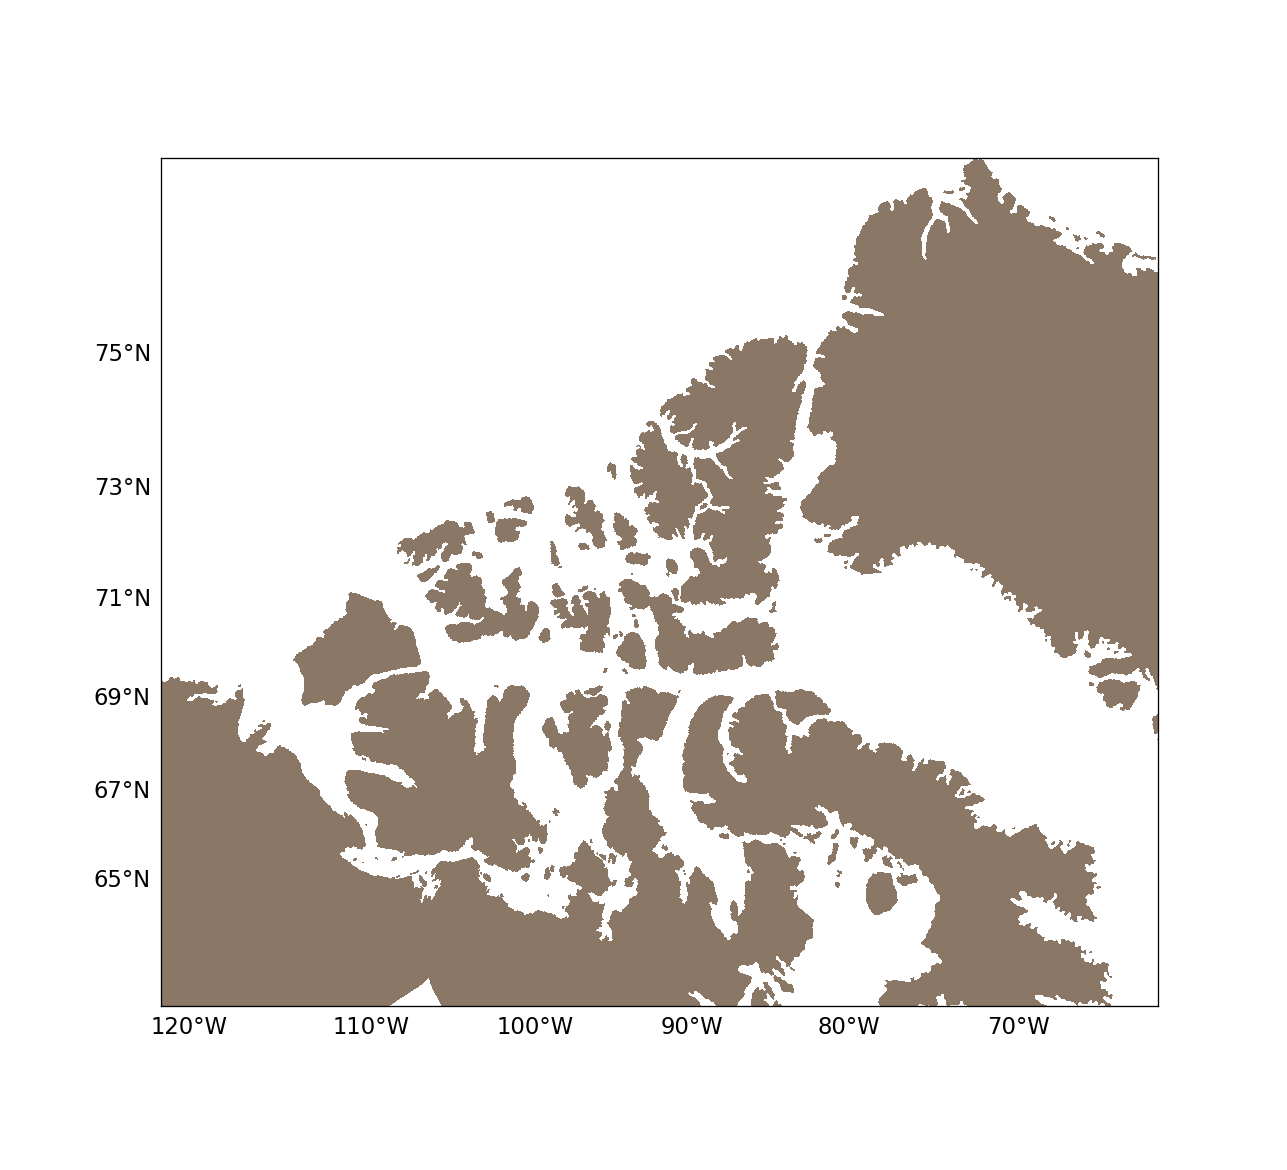

In [9]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

In [10]:
def months_overview(var, title, levels, min_v, max_v, proj=proj):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.rain
    cbar  = proj.contourf(x, y, var[0, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,0])
    proj.contourf(x, y, var[1, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[2, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[3, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[4, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[5, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[6, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    proj.contourf(x, y, var[7, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[8, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[9, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[10, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
    proj.contourf(x, y, var[11, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,3])
    
    # figure out how to add to a different set of axes
    #plt.colorbar(jan, ax=ax[0,0])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')
    
    fig = gcf()
    fig.suptitle(title)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
    fig.colorbar(cbar, cax=cbar_ax)

    return

In [11]:
def monthly_changes(var, title, levels, min_v, max_v, proj=proj):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.rain
    proj.contourf(x, y, var[0, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[1, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[2, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[3, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[4, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[5, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    cbar = proj.contourf(x, y, var[6, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[7, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[8, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[9, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
    proj.contourf(x, y, var[10, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,3])
    
    # figure out how to add to a different set of axes
    #plt.colorbar(jan, ax=ax[0,0])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')
    
    fig = gcf()
    fig.suptitle(title)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
    fig.colorbar(cbar, cax=cbar_ax)
    
    return

## Contribution of bio:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_ref1   |  none                   | Bio                            |
| mn_test1f |  Bio                    |                                |

In [12]:
bio_ave  = ref1_mn_ave  - t1f_mn_ave
bio_diff = ref1_mn_diff - t1f_mn_diff

In [13]:
print('Monthly    average               change')
print('Max:  ', np.amax(bio_ave), '          ', np.amax(bio_diff[0:10,:,:]))
print('Min:  ', np.amin(bio_ave), '        ', np.amin(bio_diff[0:10,:,:]))
print('Ave:  ', np.average(bio_ave), ' ', np.average(bio_diff[0:10,:,:]))

Monthly    average               change
Max:   1.2247536e-09            0.0
Min:   -1.1660868e-09          0.0
Ave:   -5.160041910110711e-14   0.0


Does the influence of bio really not make a difference at all or is there some code/method issue? Need to look at the nitrate files I'm using for the forcing.

<a id='ice'></a>

## Contribution of ice:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1a |  Dust, ice, bio         | ice                            |
| mn_test1b |  Dust, bio              | dust                           |

In [14]:
ice_ave  = t1b_mn_ave  - t1a_mn_ave
ice_diff = t1b_mn_diff - t1a_mn_diff

In [45]:
print('Monthly    average               change')
print('Max:  ', np.amax(ice_ave), '          ', np.amax(ice_diff))
print('Min:  ', np.amin(ice_ave), '        ', np.amin(ice_diff))
print('Ave:  ', np.average(ice_ave), ' ', np.average(ice_diff))

Monthly    average               change
Max:   4.3279314e-08            3.6544623e-08
Min:   -6.865635e-09          -3.5288167e-08
Ave:   9.260743576825059e-10   1.8639820638499192e-10


<IPython.core.display.Javascript object>


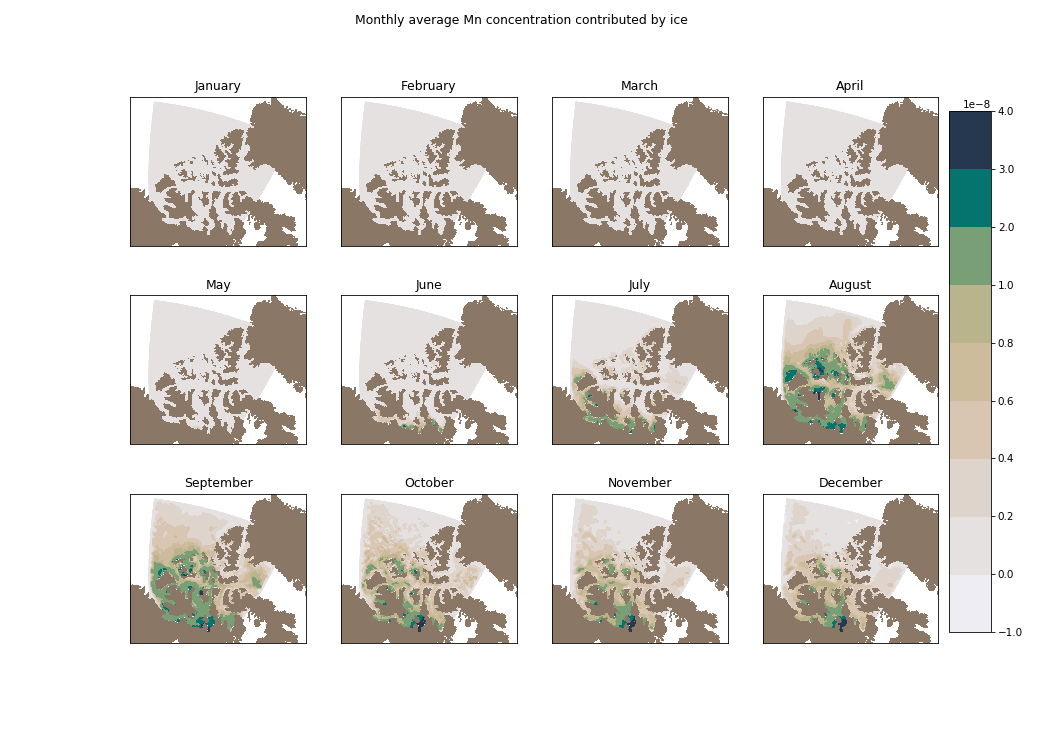

In [26]:
levels_ice_ave = [-1e-8, 0, 2e-9, 4e-9, 6e-9, 8e-9, 1e-8, 2e-8, 3e-8, 4e-8]
vmin  = -1e-9
vmax  = 4e-8
months_overview(ice_ave, 'Monthly average Mn concentration contributed by ice', levels_ice_ave, vmin, vmax)

<IPython.core.display.Javascript object>


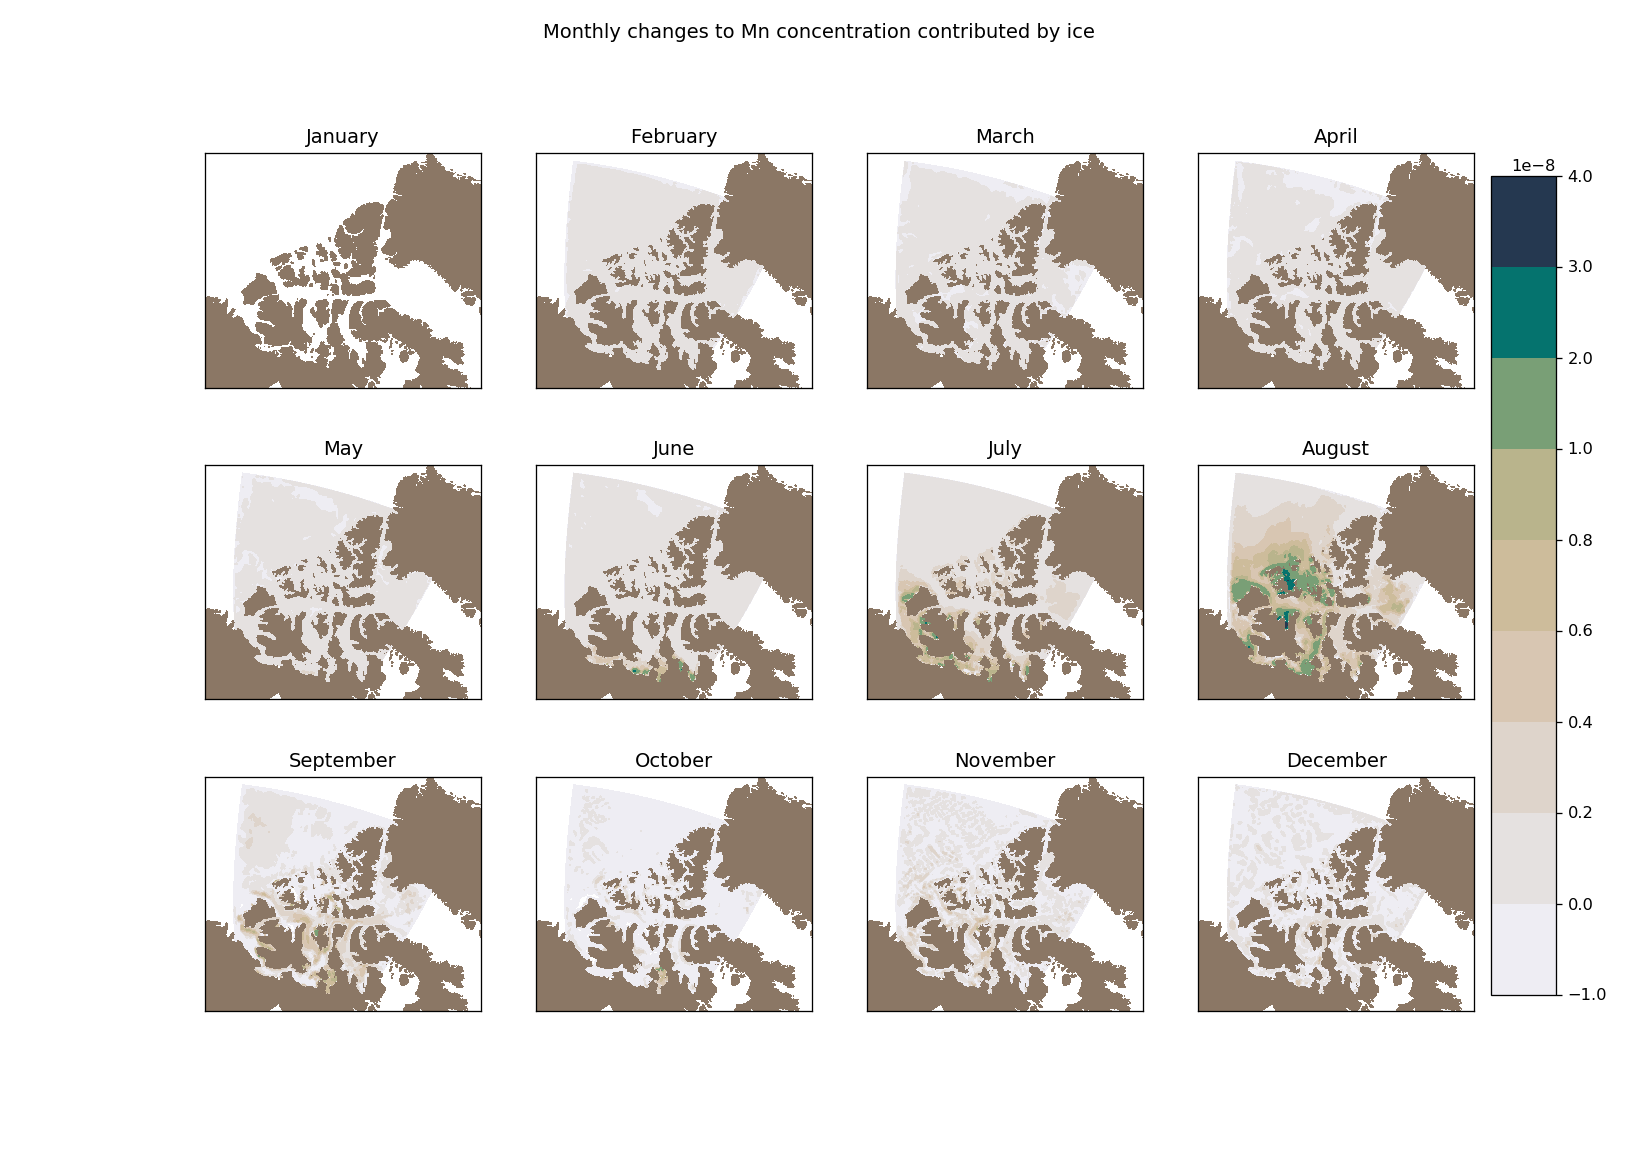

In [15]:
levels_ice_diff = [-1e-8, 0, 2e-9, 4e-9, 6e-9, 8e-9, 1e-8, 2e-8, 3e-8, 4e-8]
vmin  = -1e-9
vmax  = 4e-8
monthly_changes(ice_diff, 'Monthly changes to Mn concentration contributed by ice', levels_ice_diff, vmin, vmax)

<a id='dust'></a>

## Contribution of dust:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1b | Dust, bio               | dust                           |
| mn_test1f | Bio                     | bio                            |

In [16]:
dust_ave  = t1f_mn_ave  - t1b_mn_ave
dust_diff = t1f_mn_diff - t1b_mn_diff

In [48]:
print('Monthly    average               change')
print('Max:  ', np.amax(dust_ave), '          ', np.amax(dust_diff))
print('Min:  ', np.amin(dust_ave), '        ', np.amin(dust_diff))
print('Ave:  ', np.average(dust_ave), ' ', np.average(dust_diff))

Monthly    average               change
Max:   8.527028e-09            8.519223e-09
Min:   -8.396242e-09          -8.398567e-09
Ave:   1.4694328731780826e-12   -1.7743441404865071e-13


<IPython.core.display.Javascript object>


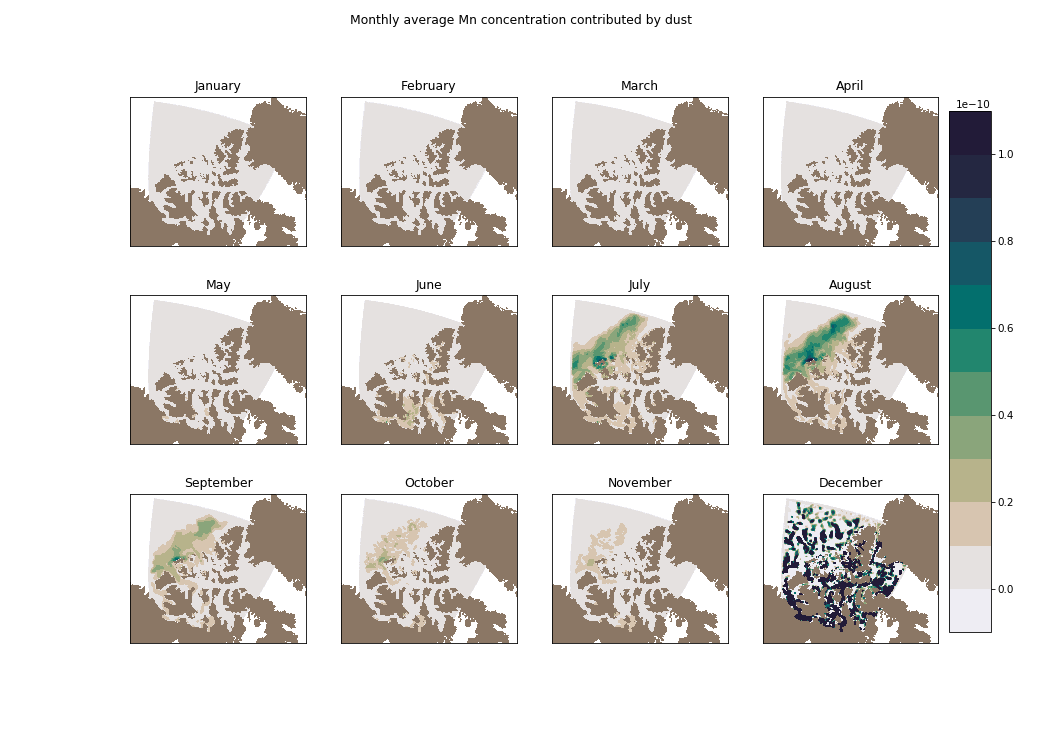

In [30]:
levels_dust_ave = [-1e-8, 0, 1e-11, 2e-11, 3e-11, 4e-11, 5e-11, 6e-11, 7e-11, 8e-11, 9e-11, 1e-10, 1e-8]
vmin  = 0.0
vmax  = 1e-10
months_overview(dust_ave, 'Monthly average Mn concentration contributed by dust', levels_dust_ave, vmin, vmax)

<IPython.core.display.Javascript object>


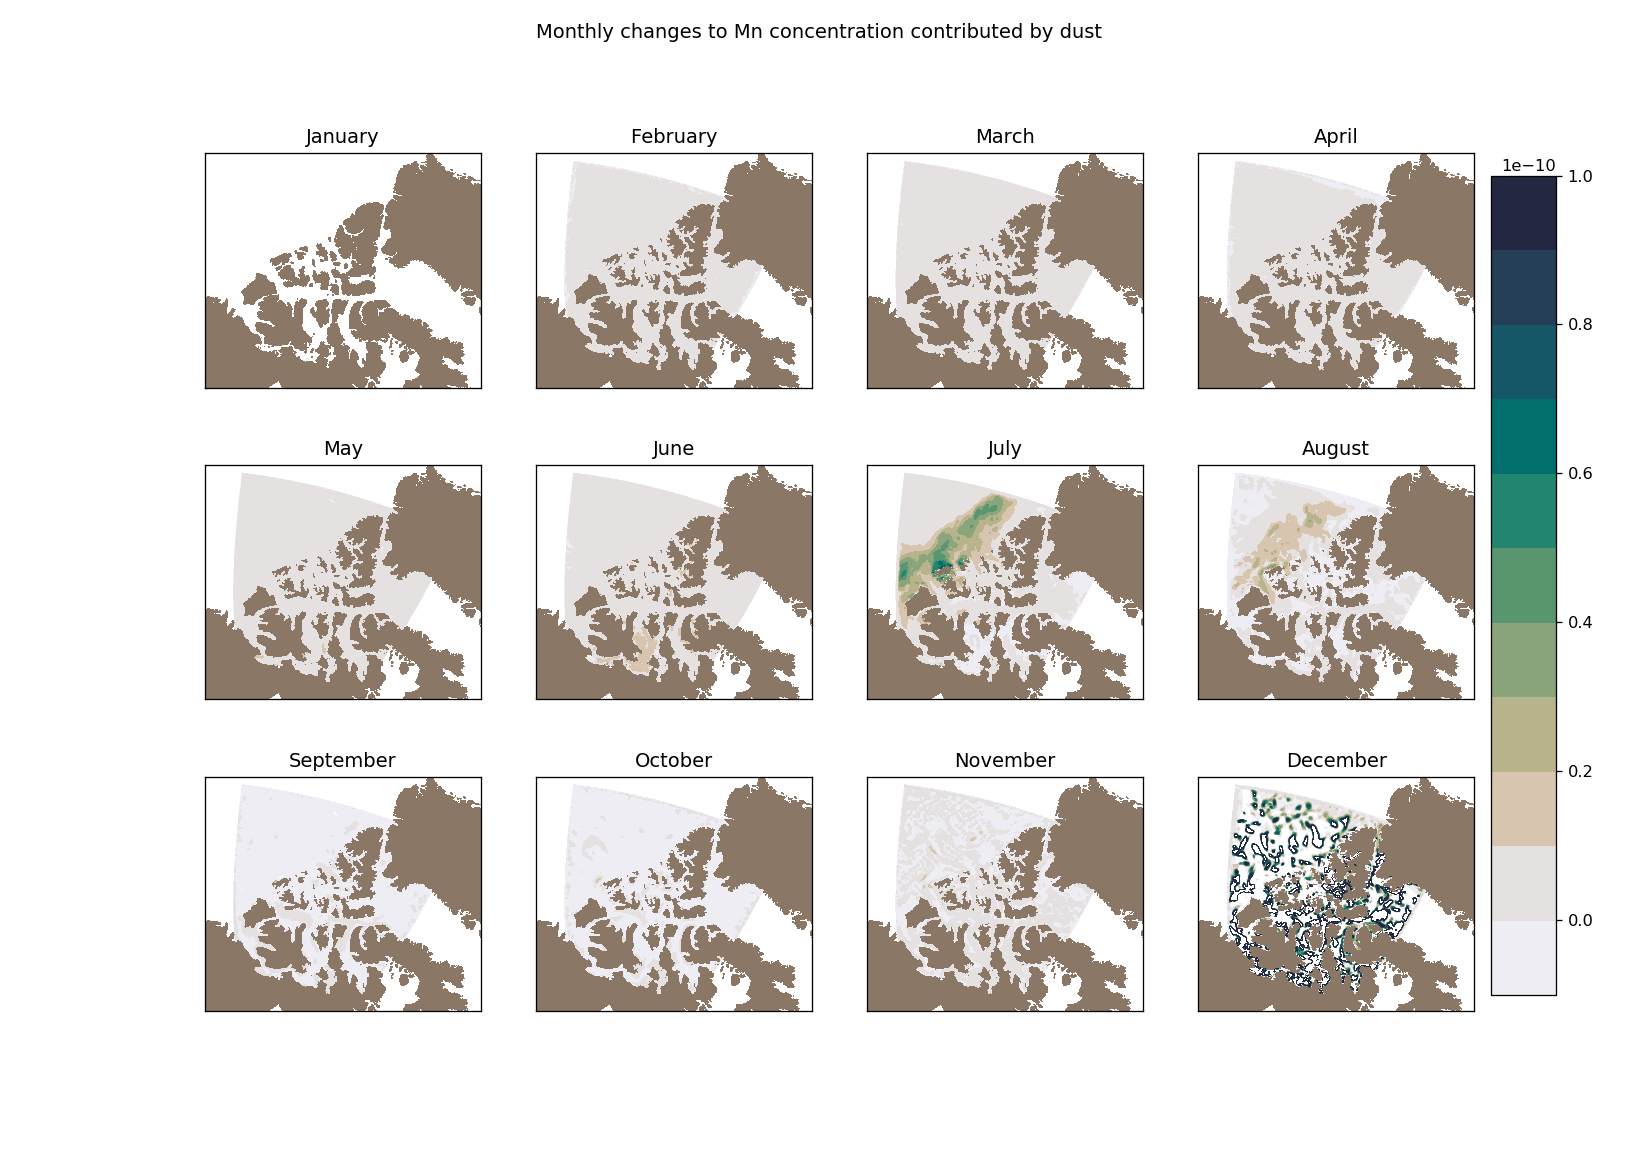

In [17]:
levels_dust_diff = [-4e-11, 0, 1e-11, 2e-11, 3e-11, 4e-11, 5e-11, 6e-11, 7e-11, 8e-11, 9e-11, 1e-10]
vmin = 0
vmax = 1e-10
monthly_changes(dust_diff, 'Monthly changes to Mn concentration contributed by dust', levels_dust_diff, vmin, vmax)

<a id='rivers'></a>

## Contribution of rivers:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1d | Rivers, bio             | rivers                         |
| mn_test1f | Bio                     | bio                            |

In [18]:
rivers_ave  = t1f_mn_ave  - t1d_mn_ave
rivers_diff = t1f_mn_diff - t1d_mn_diff

In [51]:
print('Monthly    average               change')
print('Max:  ', np.amax(rivers_ave), '          ', np.amax(rivers_diff))
print('Min:  ', np.amin(rivers_ave), '        ', np.amin(rivers_diff))
print('Ave:  ', np.average(rivers_ave), ' ', np.average(rivers_diff))

Monthly    average               change
Max:   1.7090835e-07            1.3213486e-07
Min:   -1.9049917e-09          -1.4148961e-07
Ave:   3.3375027096973813e-10   5.219561149506515e-11


<IPython.core.display.Javascript object>


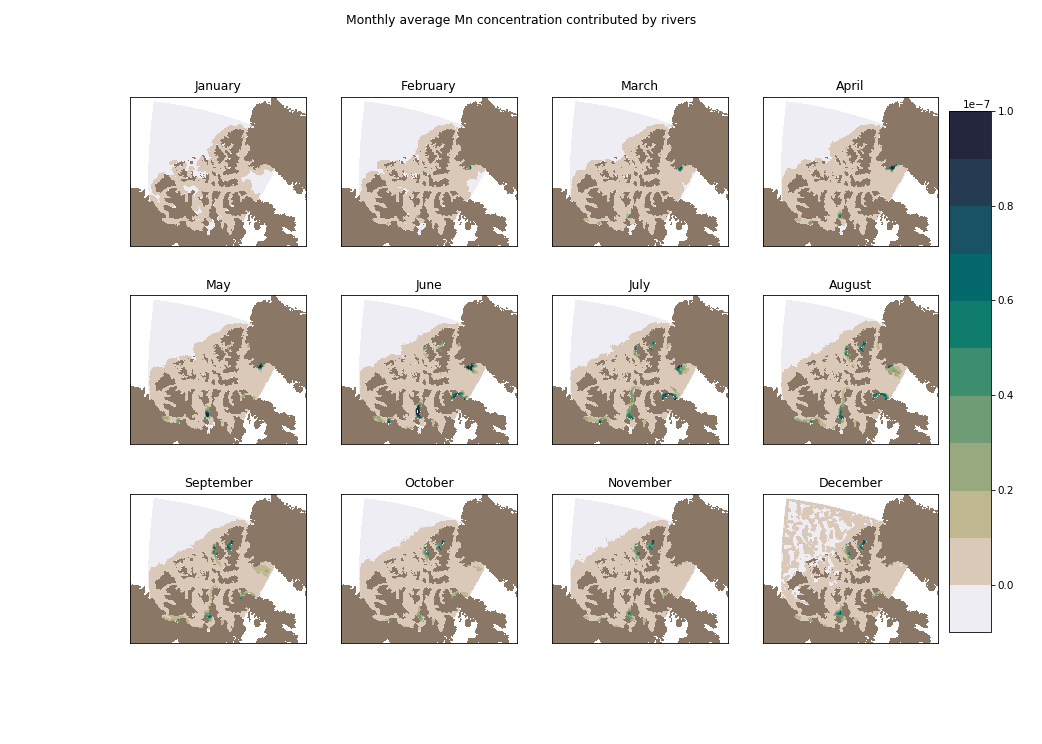

In [34]:
levels_rivers_ave = [-1e-7, 0, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
months_overview(rivers_ave, 'Monthly average Mn concentration contributed by rivers', levels_rivers_ave, vmin, vmax)

<IPython.core.display.Javascript object>


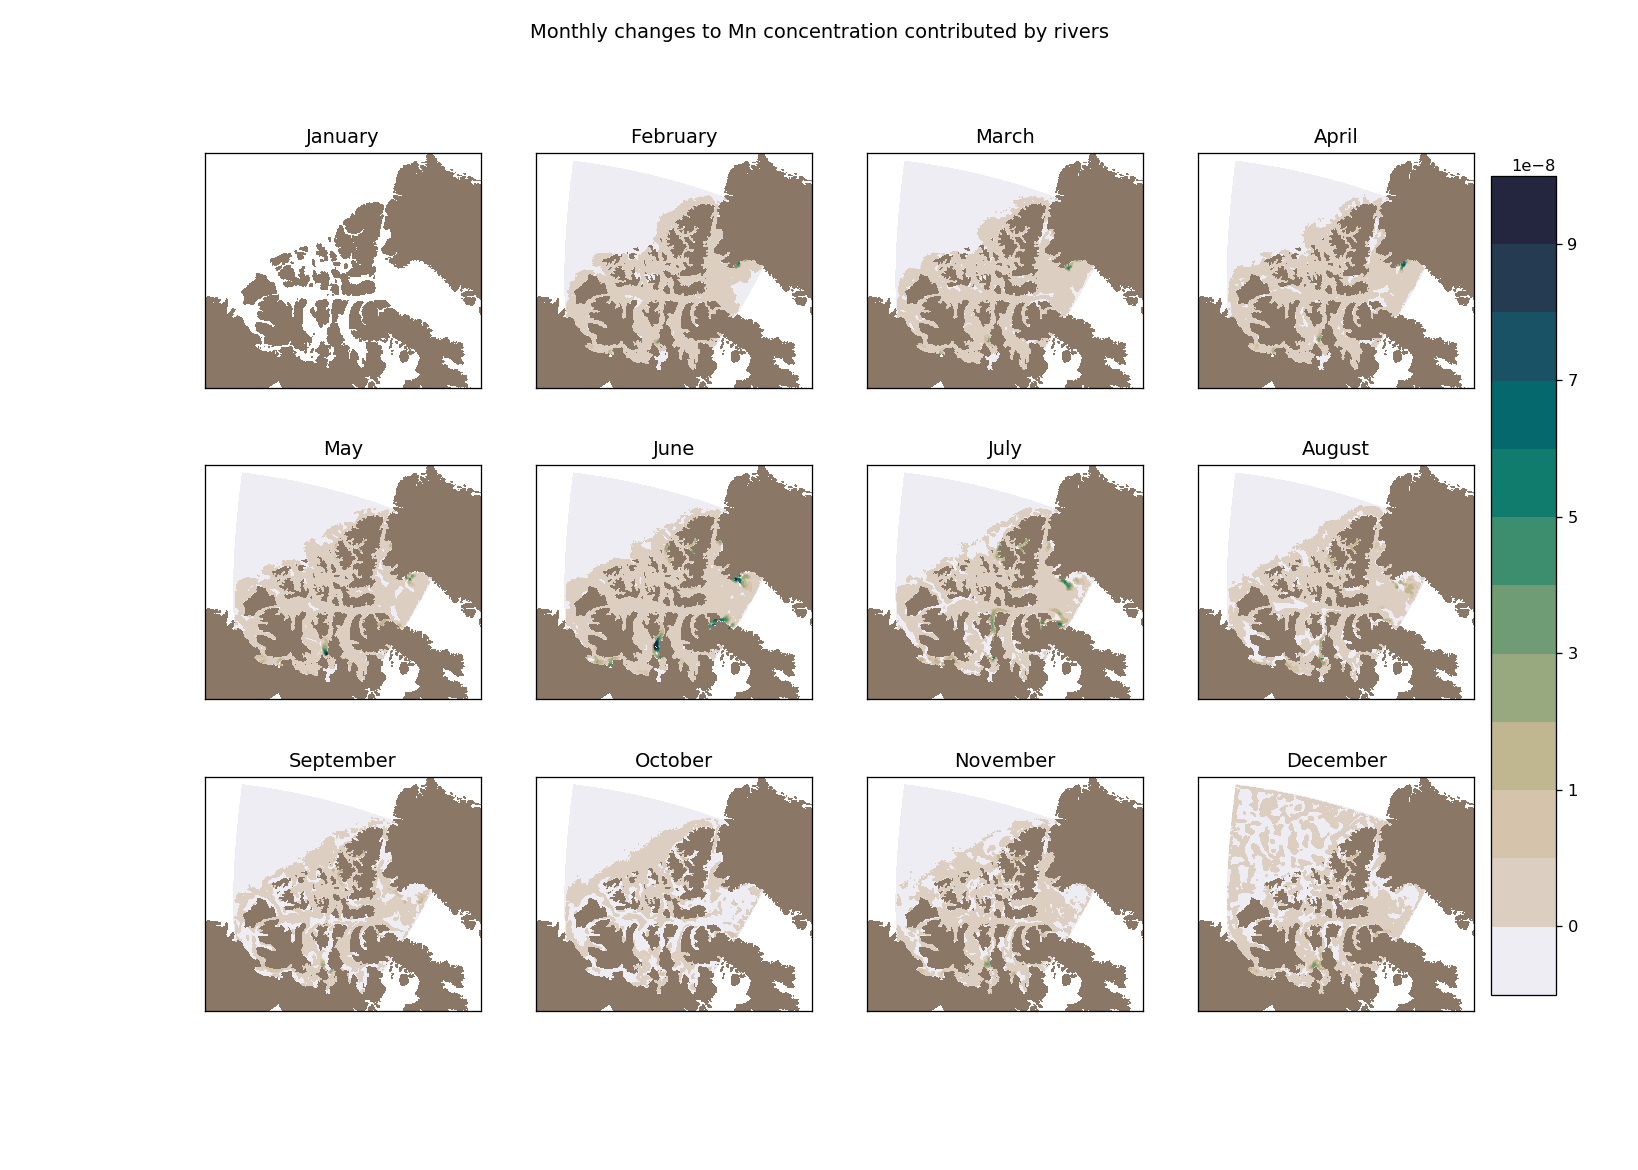

In [19]:
levels_rivers_diff = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
monthly_changes(rivers_diff, 'Monthly changes to Mn concentration contributed by rivers', levels_rivers_diff, vmin, vmax)

<a id='scavenging'></a>

## Contribution of scavenging:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1c | Scavenging, bio         | scavenging                     |
| mn_test1f | Bio                     | bio                            |

In [20]:
scav_ave  = t1f_mn_ave  - t1c_mn_ave
scav_diff = t1f_mn_diff - t1c_mn_diff

In [ ]:
print('Monthly    average               change')
print('Max:  ', np.amax(scav_ave), '          ', np.amax(scav_diff))
print('Min:  ', np.amin(scav_ave), '        ', np.amin(scav_diff))
print('Ave:  ', np.average(scav_ave), ' ', np.average(scav_diff))

<IPython.core.display.Javascript object>


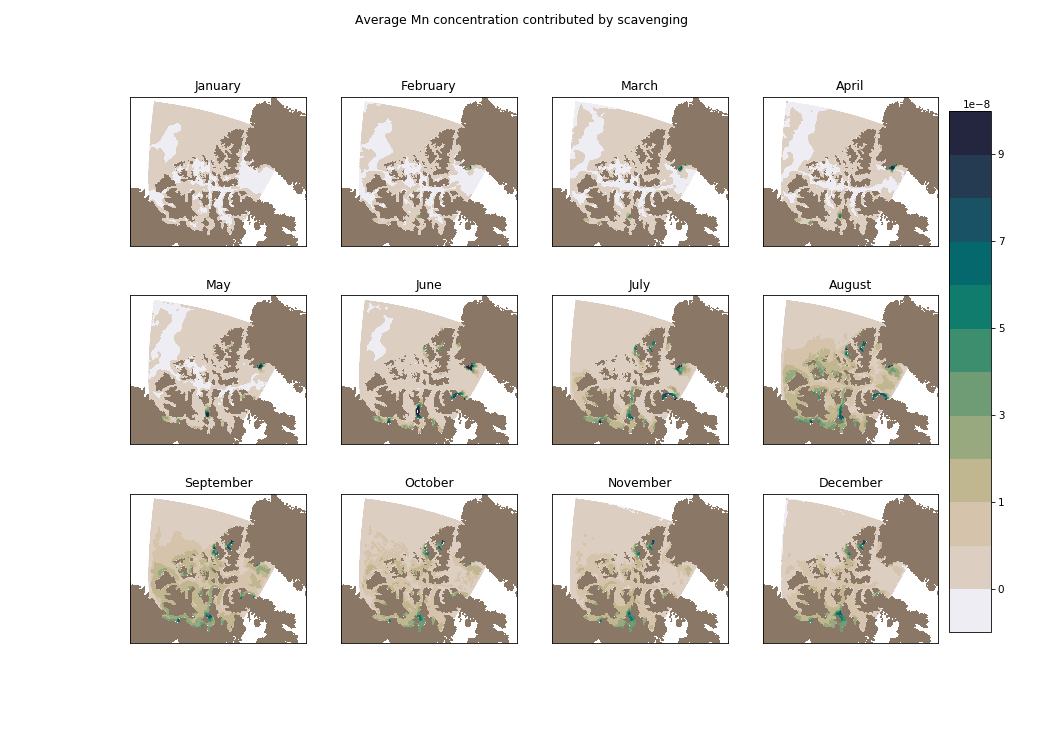

In [38]:
levels_scav_ave = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
months_overview(scav_ave, 'Average Mn concentration contributed by scavenging', levels_scav_ave, vmin, vmax)

<IPython.core.display.Javascript object>


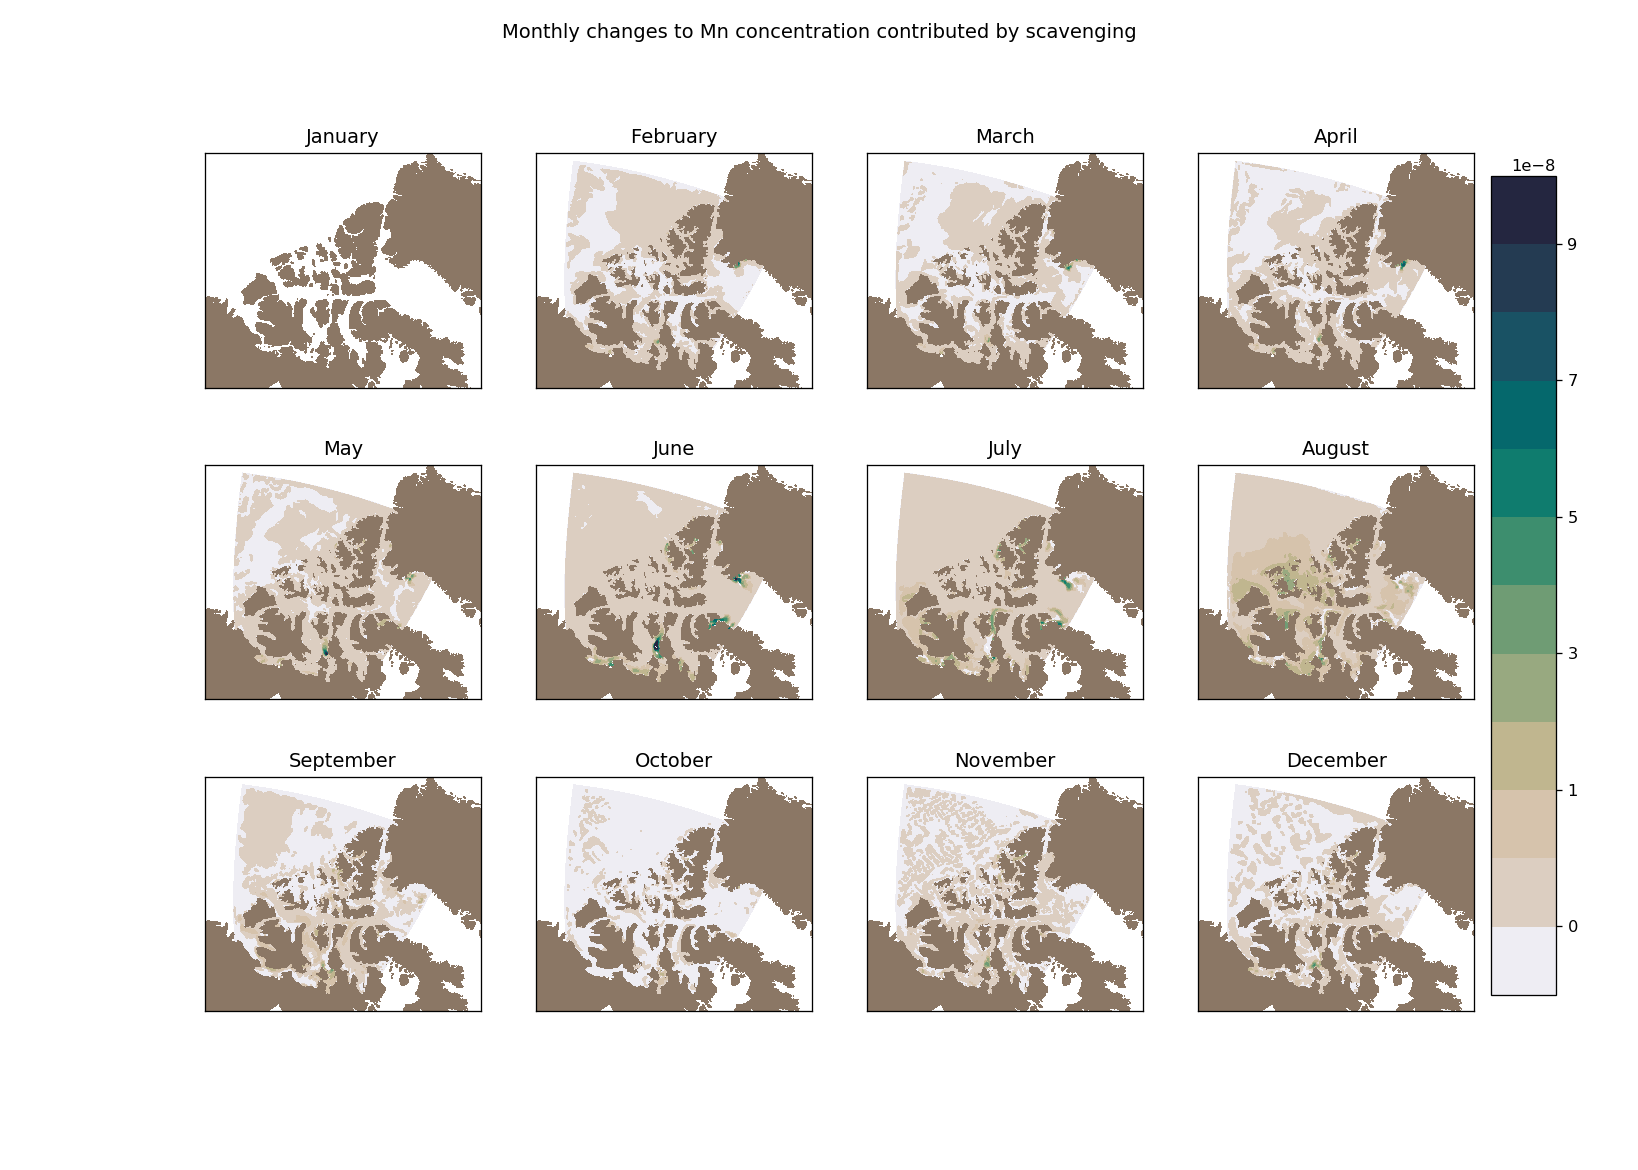

In [21]:
levels_scav_diff = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
monthly_changes(scav_diff, 'Monthly changes to Mn concentration contributed by scavenging', levels_scav_diff, vmin, vmax)

<a id='sediment'></a>

## Contribution of sediment diffusion (near the bottom bathymetry):

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1e | Sediment diffusion, bio | sediment diffusion             |
| mn_test1f | Bio                     | bio                            |

In [22]:
sed_ave  = t1f_mn_ave  - t1e_mn_ave
sed_diff = t1f_mn_diff - t1e_mn_diff

In [23]:
print('Monthly    average               change')
print('Max:  ', np.amax(sed_ave), '          ', np.amax(sed_diff))
print('Min:  ', np.amin(sed_ave), '        ', np.amin(sed_diff))
print('Ave:  ', np.average(sed_ave), ' ', np.average(sed_diff))

Monthly    average               change
Max:   1.110901e-08            3.0842457e-09
Min:   -1.6436097e-10          -2.908086e-09
Ave:   7.549784211298961e-11   1.2200461725211404e-11


<IPython.core.display.Javascript object>


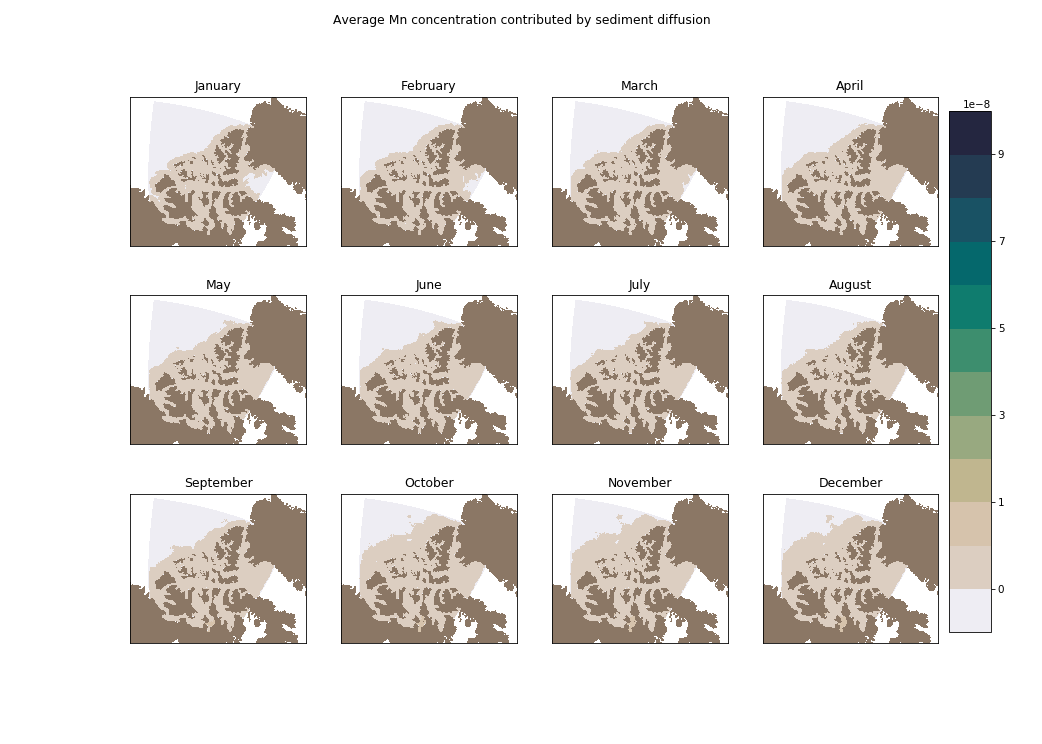

In [43]:
levels_sed_ave = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
months_overview(sed_ave, 'Average Mn concentration contributed by sediment diffusion', levels_sed_ave, vmin, vmax)

<IPython.core.display.Javascript object>


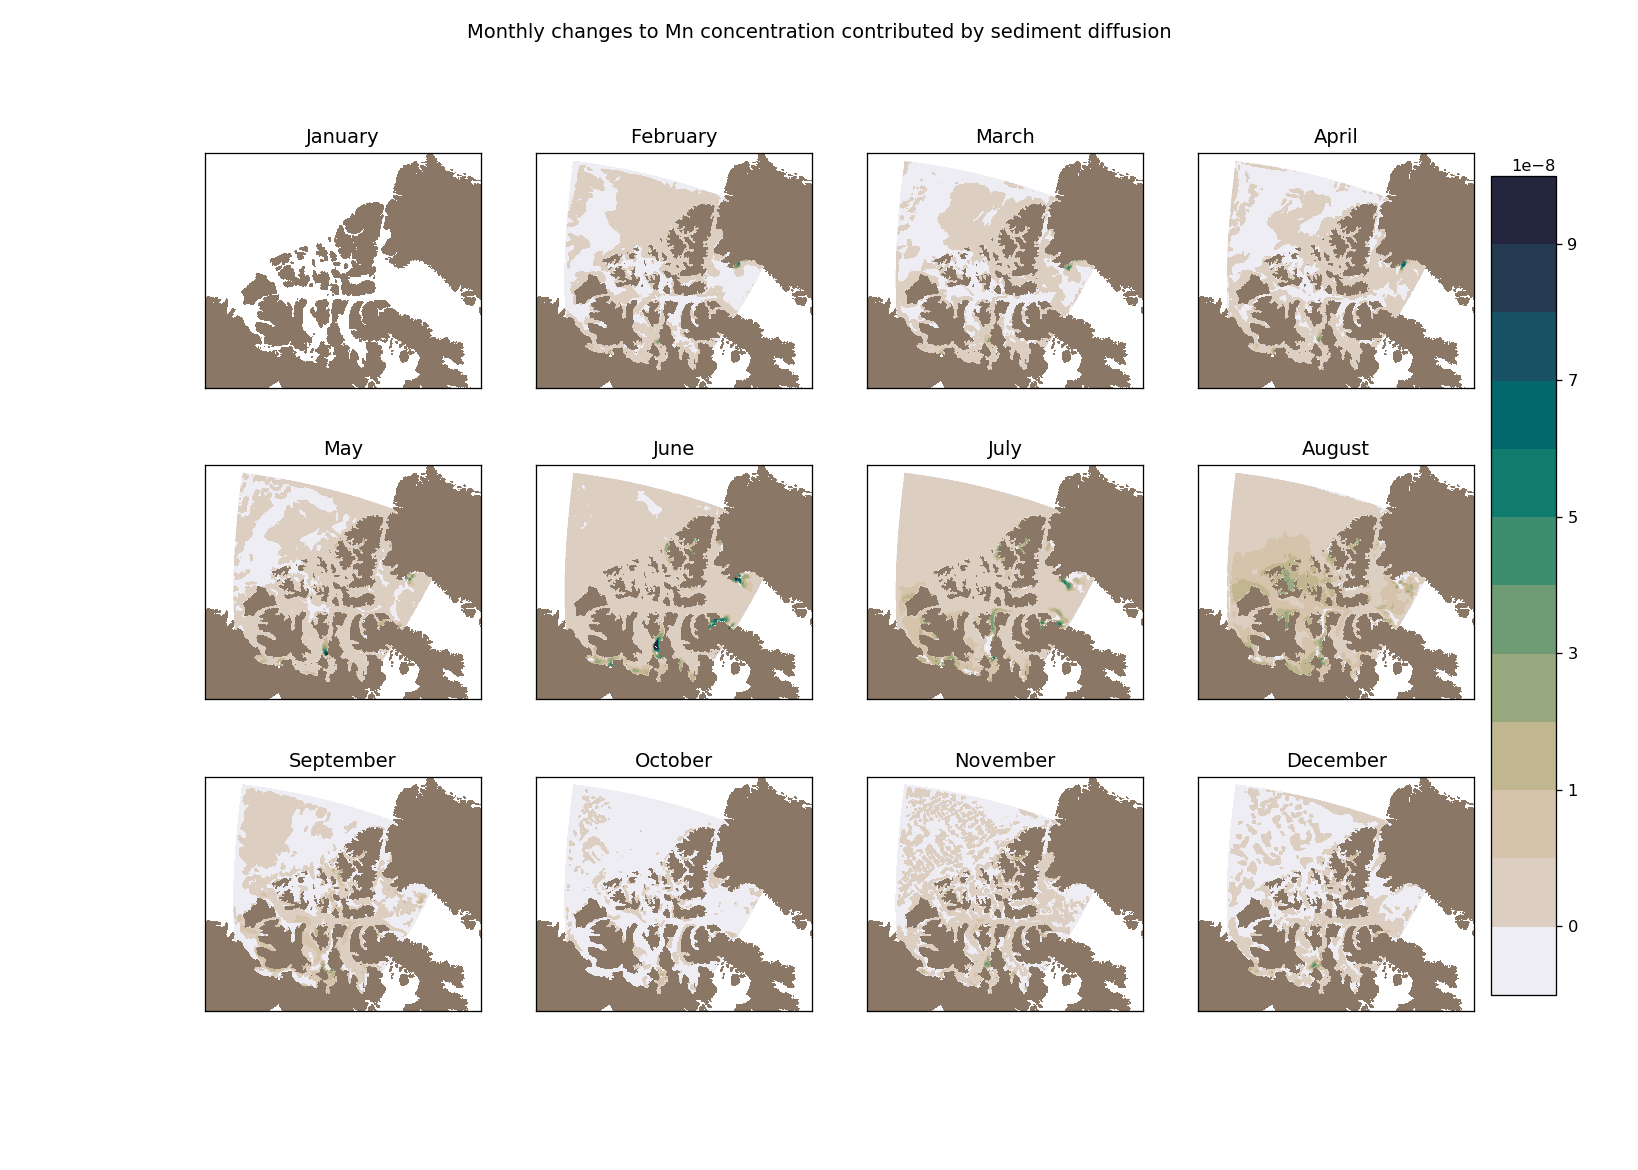

In [24]:
levels_sed_diff = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
monthly_changes(scav_diff, 'Monthly changes to Mn concentration contributed by sediment diffusion', \
                levels_sed_diff, vmin, vmax)

## Overall component comparison:

In [43]:
def proportions_bar(fig, ax, ice_sum_ave, dust_sum_ave, rivers_sum_ave, scav_sum_ave, sed_sum_ave, \
                    title, legend=False):
    # create bar plot of proportions of components
    bio_sum_ave = np.zeros(ice_sum_ave.shape)
    
    # first, calculate proportions:
    total_ave=np.zeros((12))
    for i in range(0,12):
        total_ave[i] = bio_sum_ave[i]+ dust_sum_ave[i] + rivers_sum_ave[i] + \
        scav_sum_ave[i] + sed_sum_ave[i] + ice_sum_ave[i]
           
    bio_prop    = np.divide(bio_sum_ave, total_ave) 
    dust_prop   = np.divide(dust_sum_ave, total_ave) 
    rivers_prop = np.divide(rivers_sum_ave, total_ave)
    scav_prop   = np.divide(scav_sum_ave, total_ave)
    sed_prop    = np.divide(sed_sum_ave, total_ave)
    ice_prop    = np.divide(ice_sum_ave, total_ave)
    
    # then, plot them:    
    width = 0.8
    colors = ['#ccb598', '#007378', '#739f78', '#cc7722', '#cee7fd', '#ffd700'] # dust, rivers, scavenging, sediment diffusion, ice

    months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for i in range(0,12):
        ax.bar(months[i], dust_prop[i], width, color=colors[0])
        ax.bar(months[i], rivers_prop[i], width, bottom=dust_prop[i], color=colors[1])
        ax.bar(months[i], scav_prop[i], width, bottom=np.add(dust_prop[i],rivers_prop[i]), color=colors[2])
        ax.bar(months[i], sed_prop[i], width, \
               bottom=np.add(np.add(dust_prop[i], rivers_prop[i]), scav_prop[i]), color=colors[3])
        ax.bar(months[i], ice_prop[i], width, \
               bottom=np.add(np.add(np.add(dust_prop[i],rivers_prop[i]), scav_prop[i]),sed_prop[i]), \
               color=colors[4])
        ax.bar(months[i], bio_prop[i], width, \
               bottom=np.add(np.add(np.add(np.add(dust_prop[i],rivers_prop[i]), scav_prop[i]),sed_prop[i]),\
                             ice_prop[i]), color=colors[5])

    # for legend:
    ax.bar(months[0], dust_prop[0]  , 0, color=colors[0], label='Dust')
    ax.bar(months[0], rivers_prop[0], 0, color=colors[1], label='Rivers')
    ax.bar(months[0], scav_prop[0]  , 0, color=colors[2], label='Scavenging')
    ax.bar(months[0], sed_prop[0]   , 0, color=colors[3], label='Sediment diffusion')
    ax.bar(months[0], ice_prop[0]   , 0, color=colors[4], label='Ice')
    ax.bar(months[0], bio_prop[0]   , 0, color=colors[5], label='Bio')

    xmin, xmax = ax.get_xlim()
    ax.plot([xmin, xmax],[0, 0],'-k',linewidth=1)
    ax.set_title(title)
    ax.set_xlim([xmin, xmax])
    if legend:
        ax.legend(fancybox=True, framealpha=0.95)
        
    return #dust_prop, rivers_prop, scav_prop, sed_prop, ice_prop

Calculate sum of all surface grid cells each month

In [26]:
bio_sum   = np.sum(np.sum(bio_diff[:,0,:,:],axis=1),axis=1)
ice_sum   = np.sum(np.sum(ice_diff[:,0,:,:],axis=1),axis=1)
dust_sum   = np.sum(np.sum(dust_diff[:,0,:,:],axis=1),axis=1)
rivers_sum = np.sum(np.sum(rivers_diff[:,0,:,:],axis=1),axis=1)
scav_sum   = np.sum(np.sum(scav_diff[:,0,:,:],axis=1),axis=1)
sed_sum    = np.sum(np.sum(sed_diff[:,0,:,:],axis=1),axis=1)

<IPython.core.display.Javascript object>


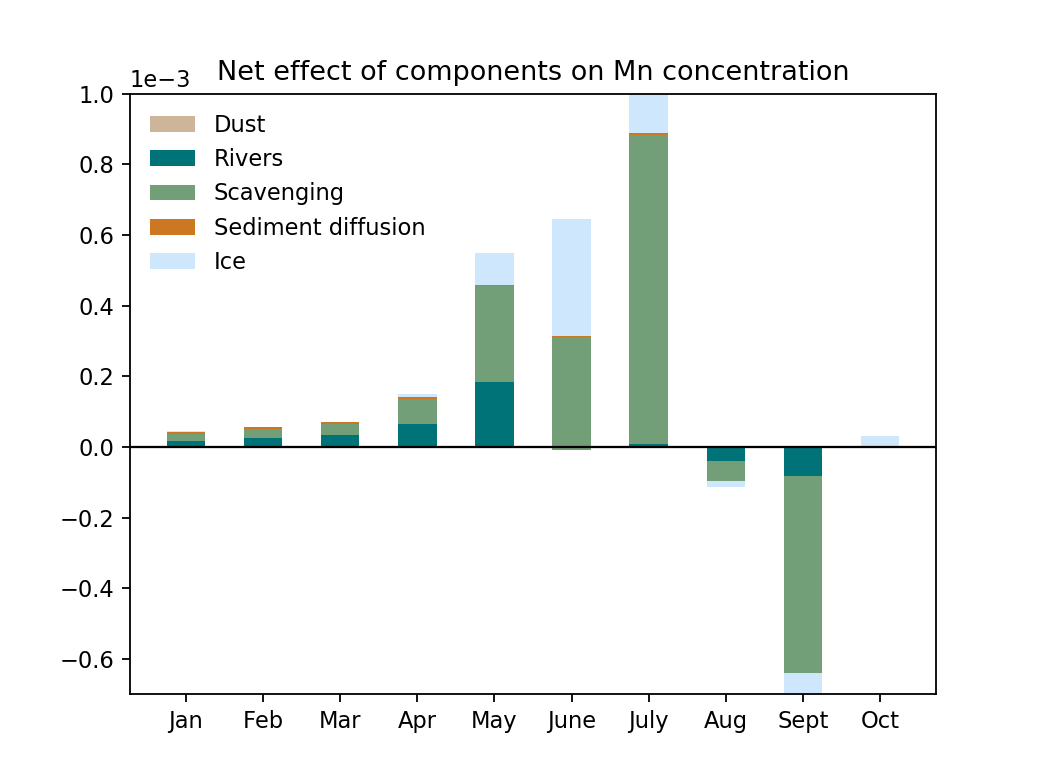

In [27]:
width = 0.5

colors = ['#ccb598', '#007378', '#739f78', '#cc7722', '#cee7fd'] # dust, rivers, scavenging, sediment diffusion

fig, ax = plt.subplots()
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']
for i in range(0,10):
    ax.bar(months[i], dust_sum[i], width, color=colors[0])
    ax.bar(months[i], rivers_sum[i], width, bottom=dust_sum[i], color=colors[1])
    ax.bar(months[i], scav_sum[i], width, bottom=np.add(dust_sum[i],rivers_sum[i]), color=colors[2])
    ax.bar(months[i], sed_sum[i], width, bottom=np.add(np.add(dust_sum[i], rivers_sum[i]),scav_sum[i]), color=colors[3])
    ax.bar(months[i], ice_sum[i], width, bottom=np.add(np.add(np.add(dust_sum[i], rivers_sum[i]), \
                                                           scav_sum[i]),sed_sum[i]), color=colors[4])
# for legend:
ax.bar(months[0], dust_sum[0]  , 0, color=colors[0], label='Dust')
ax.bar(months[0], rivers_sum[0], 0, color=colors[1], label='Rivers')
ax.bar(months[0], scav_sum[0]  , 0, color=colors[2], label='Scavenging')
ax.bar(months[0], sed_sum[0]   , 0, color=colors[3], label='Sediment diffusion')
ax.bar(months[0], ice_sum[0]   , 0, color=colors[4], label='Ice')
        
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax],[0, 0],'-k',linewidth=1)
ax.set_title('Net effect of components on Mn concentration')
ax.set_ylim([-7e-4, 1e-3])
ax.set_xlim([xmin, xmax])
ax.legend(frameon=False)
ax.ticklabel_format(axis='y',scilimits=(-1, 1))

In [29]:
ice_sum_ave    = np.sum(np.sum(ice_ave[:,0,:,:], axis=1),axis=1)
dust_sum_ave   = np.sum(np.sum(dust_ave[:,0,:,:],axis=1),axis=1)
rivers_sum_ave = np.sum(np.sum(rivers_ave[:,0,:,:],axis=1),axis=1)
scav_sum_ave   = np.sum(np.sum(scav_ave[:,0,:,:],axis=1),axis=1)
sed_sum_ave    = np.sum(np.sum(sed_ave[:,0,:,:],axis=1),axis=1)

<IPython.core.display.Javascript object>


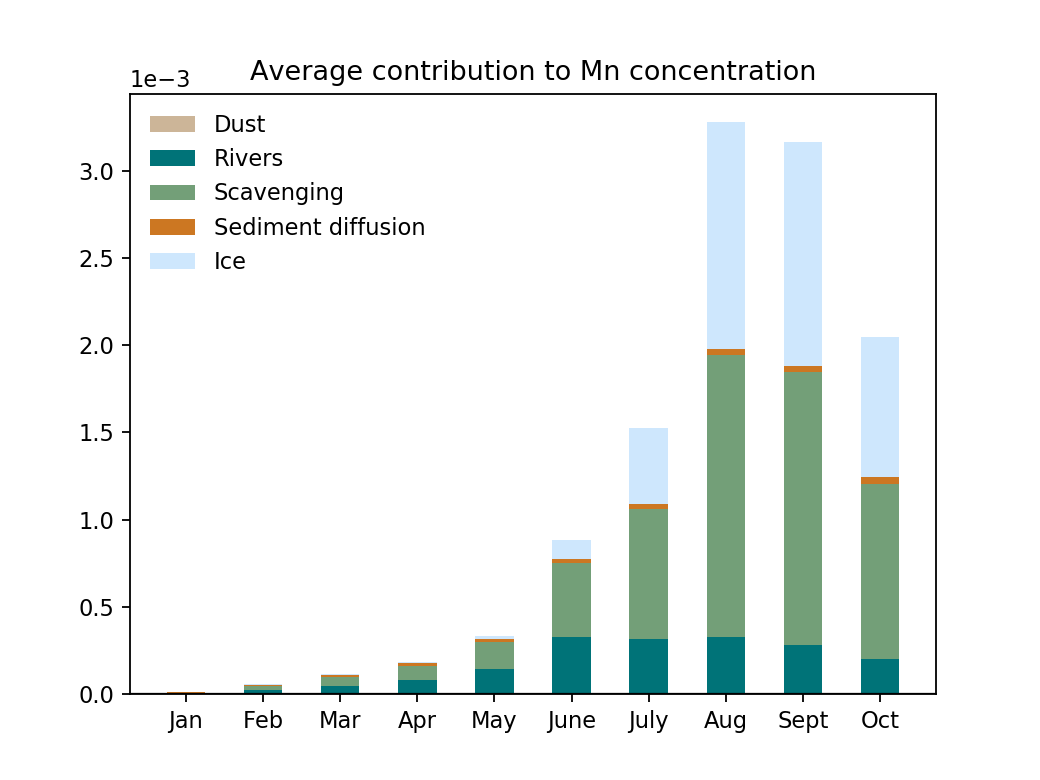

In [30]:
width = 0.5

colors = ['#ccb598', '#007378', '#739f78', '#cc7722', '#cee7fd'] # dust, rivers, scavenging, sediment diffusion

fig, ax = plt.subplots()
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']
for i in range(0,10):
    ax.bar(months[i], dust_sum_ave[i], width, color=colors[0])
    ax.bar(months[i], rivers_sum_ave[i], width, bottom=dust_sum_ave[i], color=colors[1])
    ax.bar(months[i], scav_sum_ave[i], width, bottom=np.add(dust_sum_ave[i],rivers_sum_ave[i]), color=colors[2])
    ax.bar(months[i], sed_sum_ave[i], width, bottom=np.add(np.add(dust_sum_ave[i], rivers_sum_ave[i]),scav_sum_ave[i]), color=colors[3])
    ax.bar(months[i], ice_sum_ave[i], width, bottom=np.add(np.add(np.add(dust_sum_ave[i], rivers_sum_ave[i]), \
                                                           scav_sum_ave[i]),sed_sum_ave[i]), color=colors[4])
# for legend:
ax.bar(months[0], dust_sum_ave[0]  , 0, color=colors[0], label='Dust')
ax.bar(months[0], rivers_sum_ave[0], 0, color=colors[1], label='Rivers')
ax.bar(months[0], scav_sum_ave[0]  , 0, color=colors[2], label='Scavenging')
ax.bar(months[0], sed_sum_ave[0]   , 0, color=colors[3], label='Sediment diffusion')
ax.bar(months[0], ice_sum_ave[0]   , 0, color=colors[4], label='Ice')
    
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax],[0, 0],'-k',linewidth=1)
ax.set_title('Average contribution to Mn concentration')
ax.set_xlim([xmin, xmax])
ax.legend(frameon=False)
ax.ticklabel_format(axis='y',scilimits=(-1, 1))

# Seperate components into water masses (roughly):

- Polar mixed layer (0-40 m)
    - PML depth levels = 1 to 17
- Pacific/halocline water (40-300 m)
    - PW depth levels = 17 to 29
- Atlantic water (300-800 m)
    - AW depth levels = 29 to 35
- Deep water (> 800 m)
    - DW depth levels = 35-50
    
Note that if a component has a negative contribution (i.e. removal), I take the absolute value of this contribution. So, what I'm really looking at is the importance of the component in the concentration/distribution of the trace metal.

In [31]:
def check_negative(ice_sum_ave, dust_sum_ave, rivers_sum_ave, scav_sum_ave, sed_sum_ave):
    months = np.array(['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
    print('Net contributors to loss of dissolved Mn')
    print('Ice during months: ', months[ice_sum_ave<0])
    print('Dust during months: ', months[dust_sum_ave<0])
    print('Rivers during months: ', months[rivers_sum_ave<0])
    print('Scavenging during months: ', months[scav_sum_ave<0])
    print('Sediment diffusion during months: ', months[sed_sum_ave<0])
    return

### PML

In [32]:
PML_ice_ave    = np.sum(ice_ave[:,0:17,:,:],axis=1)
PML_dust_ave   = np.sum(dust_ave[:,0:17,:,:],axis=1)
PML_rivers_ave = np.sum(rivers_ave[:,0:17,:,:],axis=1)
PML_scav_ave   = np.sum(scav_ave[:,0:17,:,:],axis=1)
PML_sed_ave    = np.sum(sed_ave[:,0:17,:,:],axis=1)

In [33]:
PML_ice_sum_ave    = np.sum(np.sum(PML_ice_ave  ,axis=1), axis=1)
PML_dust_sum_ave   = np.sum(np.sum(PML_dust_ave  ,axis=1), axis=1)
PML_rivers_sum_ave = np.sum(np.sum(PML_rivers_ave,axis=1), axis=1)
PML_scav_sum_ave   = np.sum(np.sum(PML_scav_ave  ,axis=1), axis=1)
PML_sed_sum_ave    = np.sum(np.sum(PML_sed_ave   ,axis=1), axis=1)

check_negative(PML_ice_sum_ave, PML_dust_sum_ave, PML_rivers_sum_ave, PML_scav_sum_ave, PML_sed_sum_ave)

PML_ice_sum_ave    = np.abs(PML_ice_sum_ave)
PML_dust_sum_ave   = np.abs(PML_dust_sum_ave)
PML_rivers_sum_ave = np.abs(PML_rivers_sum_ave)
PML_scav_sum_ave   = np.abs(PML_scav_sum_ave)
PML_sed_sum_ave    = np.abs(PML_sed_sum_ave)

Net contributors to loss of dissolved Mn
Ice during months:  []
Dust during months:  ['Dec']
Rivers during months:  []
Scavenging during months:  []
Sediment diffusion during months:  []


### PW

In [34]:
PW_ice_ave    = np.sum(ice_ave[:,17:29,:,:],axis=1)
PW_dust_ave   = np.sum(dust_ave[:,17:29,:,:],axis=1)
PW_rivers_ave = np.sum(rivers_ave[:,17:29,:,:],axis=1)
PW_scav_ave   = np.sum(scav_ave[:,17:29,:,:],axis=1)
PW_sed_ave    = np.sum(sed_ave[:,17:29,:,:],axis=1)

In [35]:
PW_ice_sum_ave    = np.sum(np.sum(PW_ice_ave   ,axis=1), axis=1)
PW_dust_sum_ave   = np.sum(np.sum(PW_dust_ave  ,axis=1), axis=1)
PW_rivers_sum_ave = np.sum(np.sum(PW_rivers_ave,axis=1), axis=1)
PW_scav_sum_ave   = np.sum(np.sum(PW_scav_ave  ,axis=1), axis=1)
PW_sed_sum_ave    = np.sum(np.sum(PW_sed_ave   ,axis=1), axis=1)

check_negative(PW_ice_sum_ave, PW_dust_sum_ave, PW_rivers_sum_ave, PW_scav_sum_ave, PW_sed_sum_ave)

PW_ice_sum_ave   = np.abs(PW_ice_sum_ave)
PW_dust_sum_ave   = np.abs(PW_dust_sum_ave)
PW_rivers_sum_ave = np.abs(PW_rivers_sum_ave)
PW_scav_sum_ave   = np.abs(PW_scav_sum_ave)
PW_sed_sum_ave    = np.abs(PW_sed_sum_ave)

Net contributors to loss of dissolved Mn
Ice during months:  []
Dust during months:  []
Rivers during months:  []
Scavenging during months:  ['Jan' 'Feb' 'Mar' 'Apr' 'June']
Sediment diffusion during months:  []


### AW

In [36]:
AW_ice_ave    = np.sum(ice_ave[:,29:35,:,:],axis=1)
AW_dust_ave   = np.sum(dust_ave[:,29:35,:,:],axis=1)
AW_rivers_ave = np.sum(rivers_ave[:,29:35,:,:],axis=1)
AW_scav_ave   = np.sum(scav_ave[:,29:35,:,:],axis=1)
AW_sed_ave    = np.sum(sed_ave[:,29:35,:,:],axis=1)

In [37]:
AW_ice_sum_ave    = np.sum(np.sum(AW_ice_ave   ,axis=1), axis=1)
AW_dust_sum_ave   = np.sum(np.sum(AW_dust_ave  ,axis=1), axis=1)
AW_rivers_sum_ave = np.sum(np.sum(AW_rivers_ave,axis=1), axis=1)
AW_scav_sum_ave   = np.sum(np.sum(AW_scav_ave  ,axis=1), axis=1)
AW_sed_sum_ave    = np.sum(np.sum(AW_sed_ave   ,axis=1), axis=1)

check_negative(AW_ice_sum_ave, AW_dust_sum_ave, AW_rivers_sum_ave, AW_scav_sum_ave, AW_sed_sum_ave)

AW_ice_sum_ave    = np.abs(AW_ice_sum_ave)
AW_dust_sum_ave   = np.abs(AW_dust_sum_ave)
AW_rivers_sum_ave = np.abs(AW_rivers_sum_ave)
AW_scav_sum_ave   = np.abs(AW_scav_sum_ave)
AW_sed_sum_ave    = np.abs(AW_sed_sum_ave)

Net contributors to loss of dissolved Mn
Ice during months:  []
Dust during months:  []
Rivers during months:  []
Scavenging during months:  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sept']
Sediment diffusion during months:  []


### DW

In [38]:
DW_ice_ave    = np.sum(ice_ave[:,35:50,:,:],axis=1)
DW_dust_ave   = np.sum(dust_ave[:,35:50,:,:],axis=1)
DW_rivers_ave = np.sum(rivers_ave[:,35:50,:,:],axis=1)
DW_scav_ave   = np.sum(scav_ave[:,35:50,:,:],axis=1)
DW_sed_ave    = np.sum(sed_ave[:,35:50,:,:],axis=1)

In [39]:
DW_ice_sum_ave    = np.sum(np.sum(DW_ice_ave   ,axis=1), axis=1)
DW_dust_sum_ave   = np.sum(np.sum(DW_dust_ave  ,axis=1), axis=1)
DW_rivers_sum_ave = np.sum(np.sum(DW_rivers_ave,axis=1), axis=1)
DW_scav_sum_ave   = np.sum(np.sum(DW_scav_ave  ,axis=1), axis=1)
DW_sed_sum_ave    = np.sum(np.sum(DW_sed_ave   ,axis=1), axis=1)

check_negative(DW_ice_sum_ave, DW_dust_sum_ave, DW_rivers_sum_ave, DW_scav_sum_ave, DW_sed_sum_ave)

DW_ice_sum_ave    = np.abs(DW_ice_sum_ave)
DW_dust_sum_ave   = np.abs(DW_dust_sum_ave)
DW_rivers_sum_ave = np.abs(DW_rivers_sum_ave)
DW_scav_sum_ave   = np.abs(DW_scav_sum_ave)
DW_sed_sum_ave    = np.abs(DW_sed_sum_ave)

Net contributors to loss of dissolved Mn
Ice during months:  ['Mar' 'Apr']
Dust during months:  ['Feb' 'Apr']
Rivers during months:  []
Scavenging during months:  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sept' 'Oct' 'Nov'
 'Dec']
Sediment diffusion during months:  []


### Overview of the water masses together:

<IPython.core.display.Javascript object>


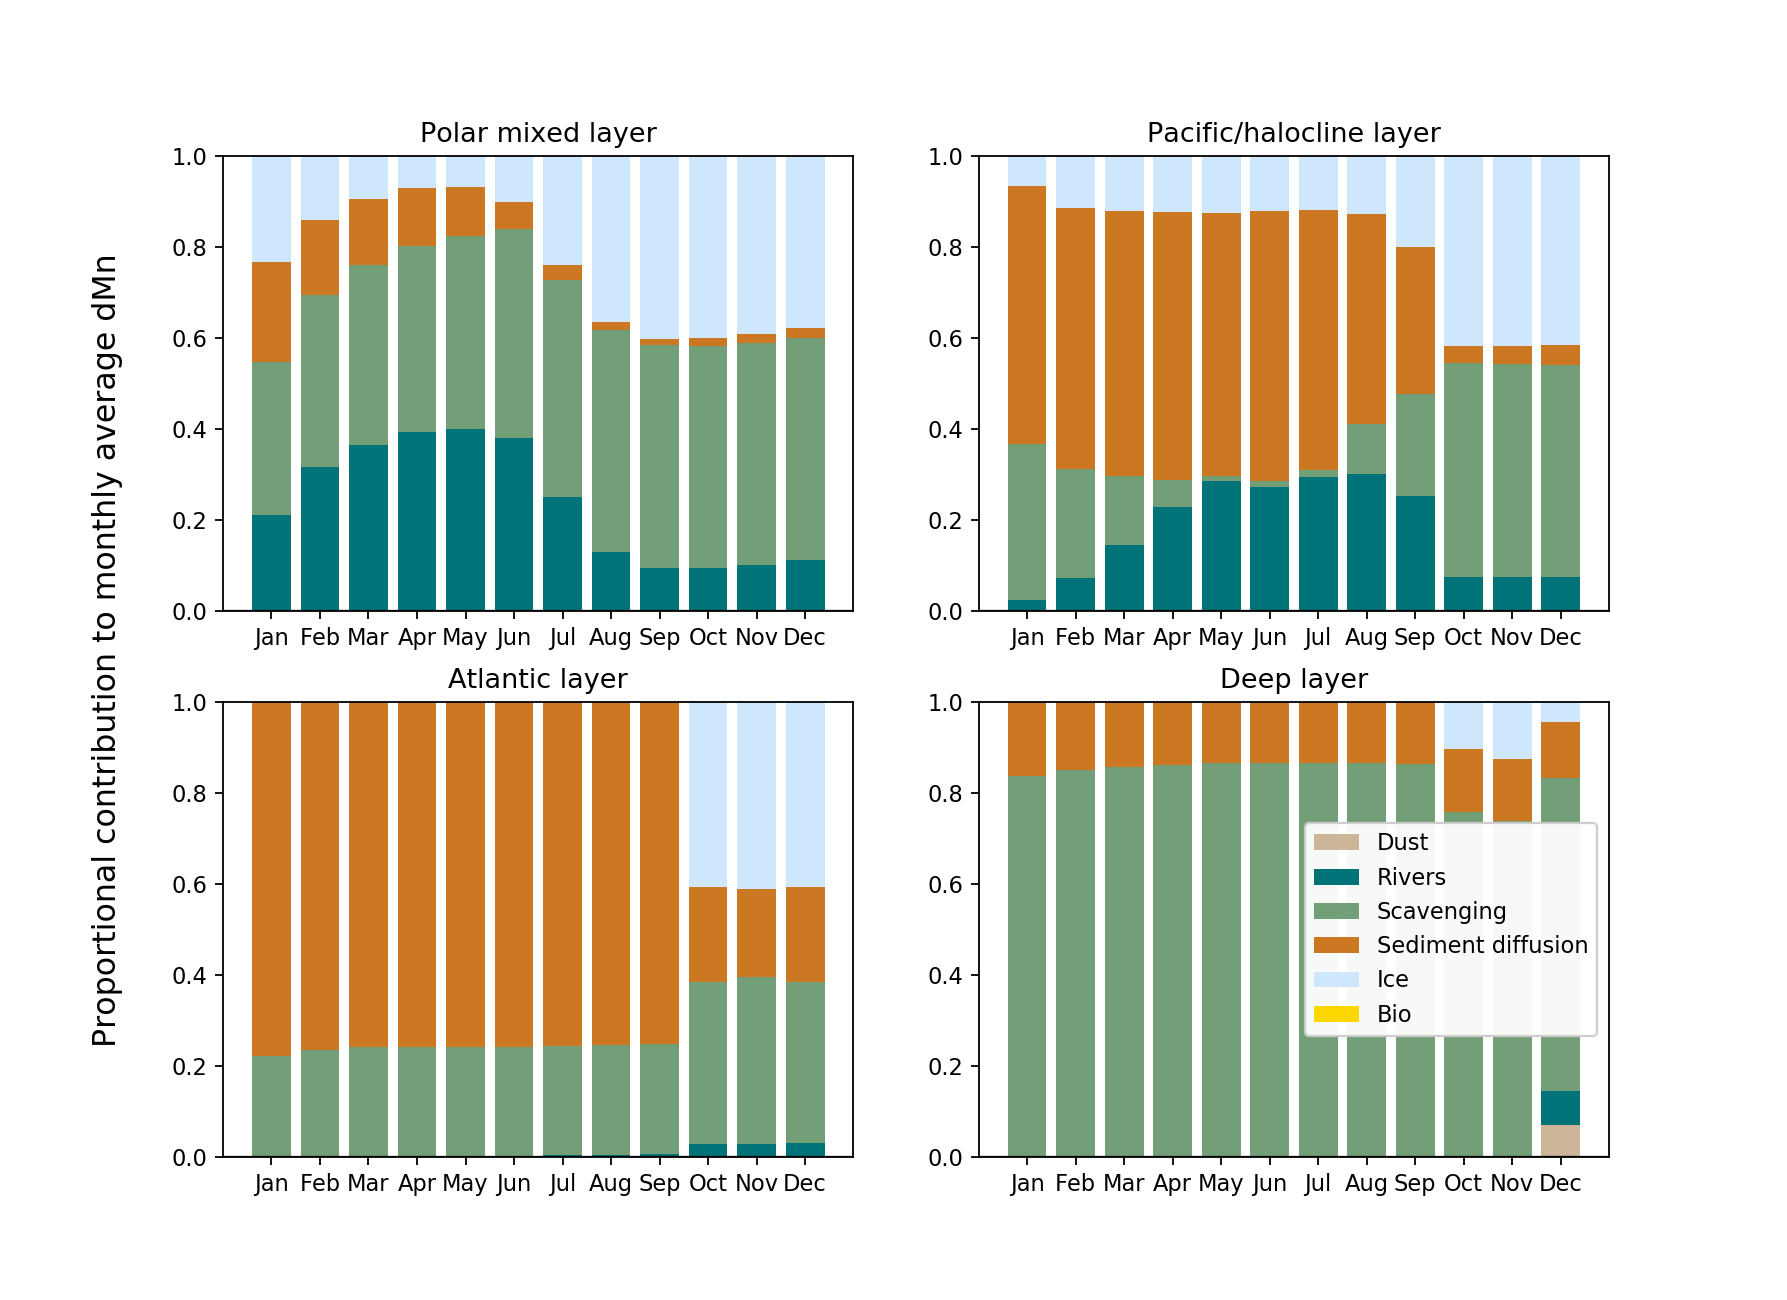

In [44]:
fig, ax = plt.subplots(2,2, figsize=(11,8))
proportions_bar(fig, ax[0,0], PML_ice_sum_ave, PML_dust_sum_ave, PML_rivers_sum_ave, \
                PML_scav_sum_ave, PML_sed_sum_ave, 'Polar mixed layer')
proportions_bar(fig, ax[0,1], PW_ice_sum_ave, PW_dust_sum_ave, PW_rivers_sum_ave, \
                PW_scav_sum_ave, PW_sed_sum_ave, 'Pacific/halocline layer')
proportions_bar(fig, ax[1,0], AW_ice_sum_ave, AW_dust_sum_ave, AW_rivers_sum_ave, \
                AW_scav_sum_ave, AW_sed_sum_ave, 'Atlantic layer')
proportions_bar(fig, ax[1,1], DW_ice_sum_ave, DW_dust_sum_ave, DW_rivers_sum_ave, \
                DW_scav_sum_ave, DW_sed_sum_ave, 'Deep layer', legend=True)

fig.text(0.06, 0.5, 'Proportional contribution to monthly average dMn', \
         ha='center', va='center', rotation='vertical', fontsize=14);

Map of regions covered by these layers:

In [68]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
land_mask = np.ma.masked_where((tmask[0,:,1480:2050,200:800] < 0.1) , tmask[0,:,1480:2050,200:800]) 

In [69]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

<IPython.core.display.Javascript object>


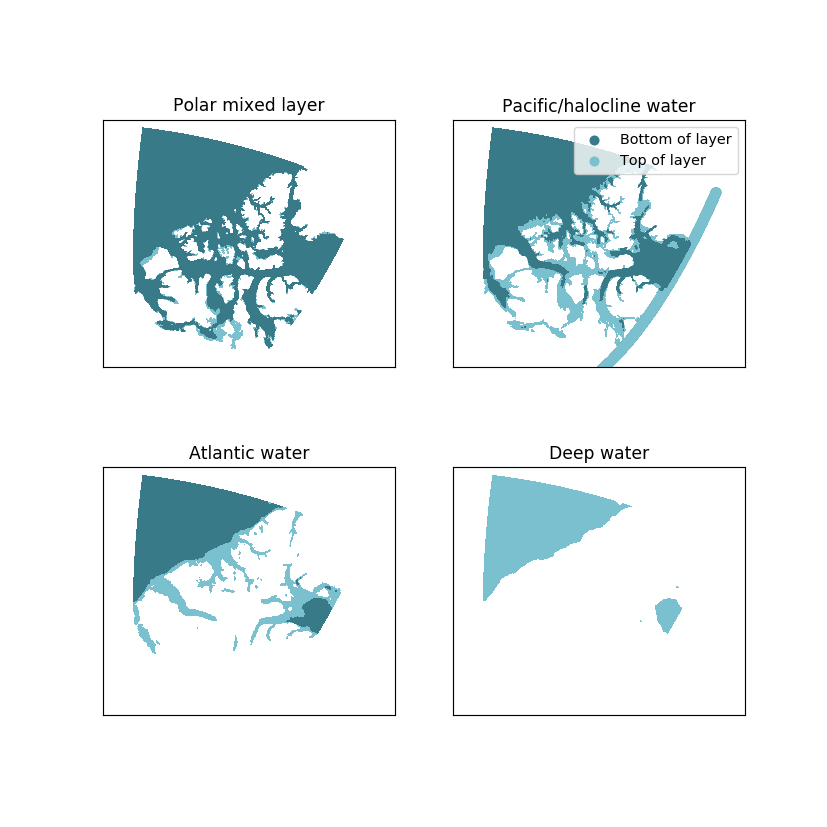

Text(0.5, 1.0, 'Deep water')

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))
bottom=matplotlib.colors.ListedColormap(["#387a87"])
top=matplotlib.colors.ListedColormap(['#7bc0ce'])

# plot 1 ---------------------------
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[0,0])
x_model, y_model = proj1(lon[1480:2050,200:800], lat[1480:2050,200:800])
proj1.contourf(x_model, y_model, land_mask[16,:,:], cmap=bottom, zorder=2)
proj1.contourf(x_model, y_model, land_mask[0,:,:], cmap=top, zorder=1)

# plot 2 ---------------------------
proj2=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[0,1])
proj2.contourf(x_model, y_model, land_mask[28,:,:], cmap=bottom, zorder=2)
proj2.contourf(x_model, y_model, land_mask[17,:,:], cmap=top, zorder=1)
proj2.scatter(x_model[0], y_model[0], c="#387a87", label='Bottom of layer')
proj2.scatter(x_model[0], y_model[0], c='#7bc0ce', label='Top of layer')

# plot 3 ---------------------------
proj3=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[1,0])
proj3.contourf(x_model, y_model, land_mask[34,:,:], cmap=bottom, zorder=2)
proj3.contourf(x_model, y_model, land_mask[29,:,:], cmap=top, zorder=1)

# plot 4 ---------------------------
proj4=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=3.0e6, height=2.55e6, ax=ax[1,1])
proj4.contourf(x_model, y_model, land_mask[49,:,:], cmap=bottom, zorder=2)
proj4.contourf(x_model, y_model, land_mask[35,:,:], cmap=top, zorder=1)

ax[0,1].legend()
ax[0,0].set_title('Polar mixed layer')
ax[0,1].set_title('Pacific/halocline water')
ax[1,0].set_title('Atlantic water')
ax[1,1].set_title('Deep water')

# Things to look at:
- shorter time scale component contributions